# Queueing theory - M/M/1 example

This notebook provides an example how to set up a queueing simulation. Input that needs to be specified are:
* 'Lambda': the number of arrivals per hour 
* 'Mu': the number of departures (services completed) per hour
* 'c': the number of servers in the system

To further characterise the queueing behaviour in the system the user has to specify the probability distributions that characterise the interarrival and service times. This notebook describes an M/M/1 queue (according to the Kendall notation for queueing systems) where both the interarrival times and the service times are assumed to be exponentially distributed.  

Currently implemented distributions are:
Currently implemented distributions are:
* 'M': Negative exponential distribution, 
* 'Ek': Erlang k distributions (where k needs to be an integer number, e.g. E2, E3 etc).
* 'D': Deterministic lists with known input

NB: the calculation becomes more accurate when a larger number of arrivals (nr_arr) is simulated. Obviously there is a tradeoff between accuracy and calculation time.

### 1. Imports

In [1]:
import openqtsim

### 2. Prepare inputs

In [2]:
# Basic input
Lambda = 8  # nr of arrivals per hour
Mu = 9  # nr of exits (services completed) per server per hour (divide total nr of exits by number of servers when c > 1)

#### Define the queue object input

In [9]:
# Create Arrival and Service processes and specify the number of servers
A = openqtsim.ArrivalProcess("M", arr_rate=Lambda)
S = openqtsim.ServiceProcess("M", srv_rate=Mu)
c = 1

#### Create the queue object and use it to create a simulating object

In [10]:
# Create the queue object and use it to create a simulating object
q = openqtsim.Queue(A, S, c)
q.kendall_notation

'M/E2/1/inf/inf/FIFO'

### 3. Run the simulation

In [11]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

nr_arr = 10_000
sim = openqtsim.Simulation(q)
sim.run(nr_arr) 

Start simulation of "M/E2/1/inf/inf/FIFO" queue

Wall time: 1.44 s


In [12]:
sim.get_stats()
print('Input IAT: {:.4f}'.format(1/Lambda))
print('Input ST: {:.4f}'.format(1/Mu))

# Interested in checking outcomes? Check at: https://www.supositorio.com/rcalc/rcalclite.htm

Waiting time over service time: 5.4197

Rho_system: system utilisation: 0.8854
Rho_server: server utilisation: 0.8854
P_0: probability nobody in the system: 0.1146

L_s: average nr of customers in the system: 6.177291135443228
L_q: average nr of customers in the queue: 5.2343882805859705
W_s: the long term average time spent in the system: 0.7087
W_q: the long term average time spent in the queue: 0.5983

IAT: average inter arrival time: 0.1247
ST: average service time: 0.1104

Input IAT: 0.1250
Input ST: 0.1111


**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average time spent in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

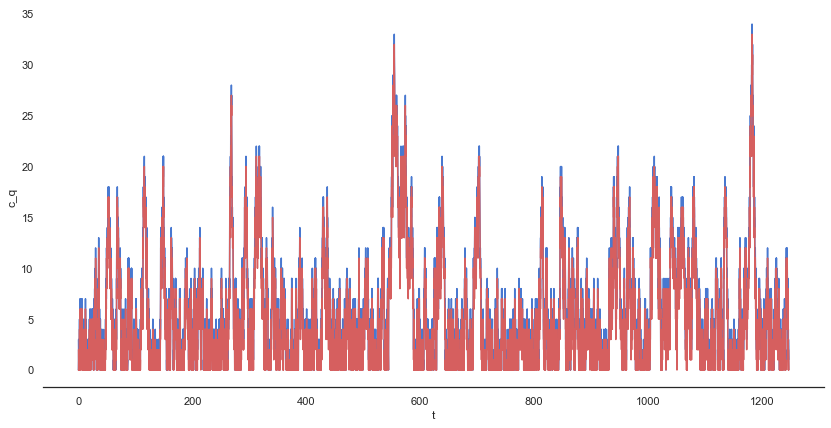

In [13]:
sim.plot_system_state()

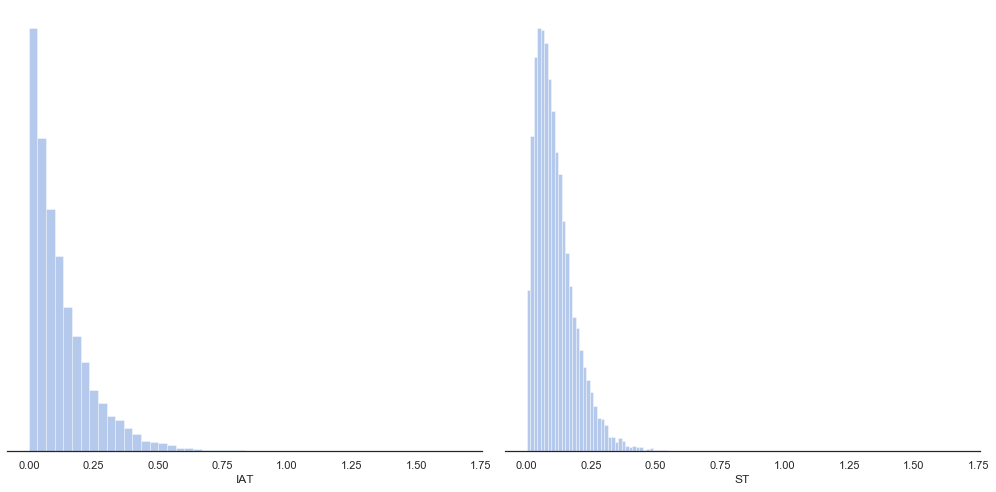

In [14]:
sim.plot_IAT_ST()

In [9]:
df_cust, df_sys = sim.return_log()

In [10]:
df_cust.head(10)

# Meaning of the columns:
# c_id: customer id
# IAT: interarrival time 
# ST: service time 
# AT: arrival time 
# TSB: time service begins
# TSE: time service ends 
# TCSS: time customer spends in the system
# TCWQ: time customer waits int he queue
# ITS: idle time server
# s_id: id of server assigned to customer

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,s_id
0,1,0.264370,0.094983,0.264370,0.264370,0.359353,0.094983,0.000000,0.264370,1
1,2,0.540528,0.240151,0.804898,0.804898,1.045049,0.240151,0.000000,0.445545,1
2,3,0.484395,0.278229,1.289294,1.289294,1.567522,0.278229,0.000000,0.244244,1
3,4,0.182496,0.142026,1.471790,1.567522,1.709548,0.237758,0.095733,0.000000,1
4,5,0.013908,0.048684,1.485697,1.709548,1.758231,0.272534,0.223850,0.000000,1
5,6,0.148030,0.175658,1.633728,1.758231,1.933889,0.300161,0.124504,0.000000,1
6,7,0.389119,0.144452,2.022846,2.022846,2.167299,0.144452,0.000000,0.088957,1
7,8,0.431949,0.181233,2.454795,2.454795,2.636028,0.181233,0.000000,0.287497,1
8,9,0.188771,0.227437,2.643566,2.643566,2.871003,0.227437,0.000000,0.007539,1
9,10,0.238531,0.228576,2.882097,2.882097,3.110673,0.228576,0.000000,0.011094,1


In [11]:
df_sys.head(10)

# Meaning of the columns:
# t: time of logging (if 'lambda' and 'mu' are specified as values per hour, the unit of 't' is hours)
# c_s: nr of customers in the system
# c_q nr of customers in the queue

,t,c_s,c_q
0,0.000000,0,0
1,0.264370,1,0
2,0.359353,0,0
3,0.804898,1,0
4,1.045049,0,0
5,1.289294,1,0
6,1.471790,2,1
8,1.485697,3,2
7,1.567522,2,1
10,1.633728,3,2


## Sandbox